<a href="https://colab.research.google.com/github/keshsri/Plant-Disease-Detection/blob/main/FYP_Recoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O archive.zip "https://www.dropbox.com/scl/fi/orop3ccua6mqx9o3651bu/archive.zip?rlkey=tme9uxnztqkhiavoywv2uwmie&dl=0.zip"

In [ ]:
import zipfile

local_zip = './archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!pip install split-folders
import splitfolders
import os

os.mkdir("dataset")

splitfolders.ratio("./PlantVillage", "./dataset", seed=1337, ratio=(.8,.1,.1))

Copying files: 20639 files [00:06, 3077.06 files/s]


In [ ]:
import os

base_dir = './dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

15


In [ ]:
print(len(os.listdir('/content/dataset/test/Pepper__bell___Bacterial_spot')))
print(len(os.listdir('/content/dataset/train/Pepper__bell___Bacterial_spot')))
print(len(os.listdir('/content/dataset/val/Pepper__bell___Bacterial_spot')))

101
797
99


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=256,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(256,256),
    batch_size=256,
    class_mode='categorical'
)

Found 16504 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.


In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(15, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 128)      

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history =  model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch=65,
    validation_steps=8,
    epochs=20,
    verbose=1
)

Epoch 1/20
65/65 [==============================] - 366s 5s/step - loss: 2.4084 - accuracy: 0.1990 - val_loss: 2.1817 - val_accuracy: 0.2910
Epoch 2/20
65/65 [==============================] - 413s 6s/step - loss: 2.0170 - accuracy: 0.3351 - val_loss: 1.9020 - val_accuracy: 0.3740
Epoch 3/20
65/65 [==============================] - 331s 5s/step - loss: 1.6030 - accuracy: 0.4684 - val_loss: 1.6125 - val_accuracy: 0.4580
Epoch 4/20
65/65 [==============================] - 330s 5s/step - loss: 1.2304 - accuracy: 0.5862 - val_loss: 1.3981 - val_accuracy: 0.5317
Epoch 5/20
65/65 [==============================] - 330s 5s/step - loss: 1.0080 - accuracy: 0.6544 - val_loss: 1.2139 - val_accuracy: 0.5977
Epoch 6/20
65/65 [==============================] - 321s 5s/step - loss: 0.8537 - accuracy: 0.7012 - val_loss: 0.6949 - val_accuracy: 0.7505
Epoch 7/20
65/65 [==============================] - 322s 5s/step - loss: 0.7276 - accuracy: 0.7456 - val_loss: 0.8509 - val_accuracy: 0.7202
Epoch 8/20
65

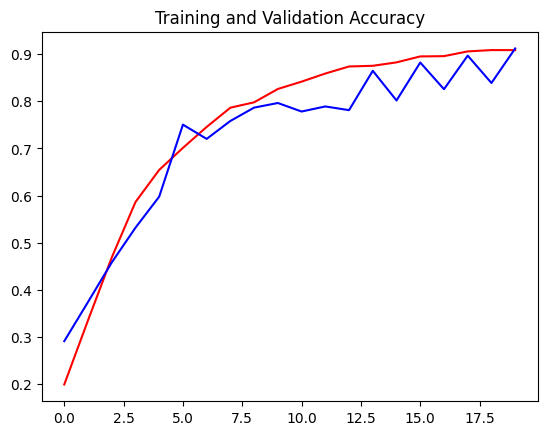

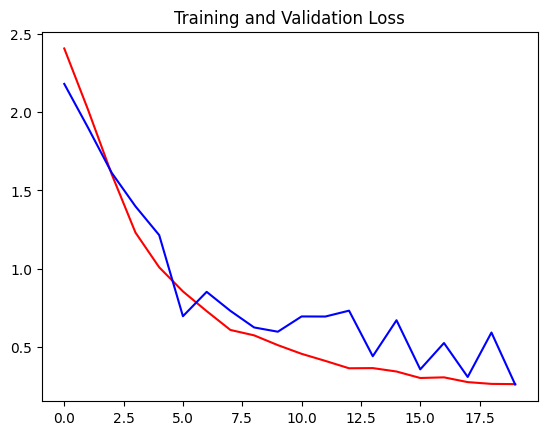

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validdation Accuracy')
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=256,
    class_mode='categorical'
)

Found 2076 images belonging to 15 classes.


In [ ]:
model.evaluate(test_generator)

9/9 [==============================] - 6s 624ms/step - loss: 0.2760 - accuracy: 0.9123


[0.27600574493408203, 0.9123314023017883]

In [ ]:
model.save('plant_disease_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download("plant_disease_detection.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>